## 公式背景介绍
摩阻系数的估计是管道系统设计的一个关键：Colebrook-White方程是计算粗糙管紊流状态时摩阻系数的一个典型方法。

Colebrook-White 方程形式如下：
$$
    \frac{1}{ \sqrt{f} }+2lg( \frac{\epsilon}{3.7D} + \frac{2.51}{Re\sqrt{f}}) = 0
$$

其中，$\epsilon$是管道内壁粗糙度，单位为m；D是管道内径，单位为m；Re是Reynoids数，无量纲量，其计算公式为

$$
    Re = \frac{\rho VD}{\mu}
$$
其中，$\rho$是流体的密度，单位为3kg / m；V是流体速度，单位为m/s；$\mu$是动态粘性，单位为2N·s / $m^3$。Reynoids数是判断流体是否为湍流的条件，只有当Re >400时才为湍流。

由文献可得，该公式的显式公式有如下两种方式： 
$$
f = [A-\frac{(B-A)^2}{C-2B+A}]^{-2}, A = -2\lg {(\frac{\epsilon}{3.7D}+\frac{12}{Re})}, B =-2\lg {(\frac{\epsilon}{3.7D}+\frac{2.51A}{Re})}, C =-2\lg {(\frac{\epsilon}{3.7D}+\frac{2.51B}{Re})}
$$

$$
\frac{1}{\sqrt{f}} = a[\ln{(\frac{d}{q})}+\delta _{CFA}], a=\frac{2}{\ln{10}}, b = \frac{\epsilon}{3.7D}, d=\frac{\ln{10}}{5.02}Re, q = s^{s/s(s+1)}, s = bd+\ln{d}
$$
$$
g = (bd+\ln{\frac{d}{q}} ), z = \ln{\frac{q}{g}}, \delta _{LA} = \frac{g}{g+1}z, \delta _{CFA} = \delta _{LA}(1+\frac{z/2}{(g+1)^{2}+(z/3)(2g-1)})
$$

In [141]:
import math
import time

## 显式公式

In [142]:
## 首先根据显式公式写出显示求解公式：
# 采用论文2中的数据进行计算。
def expilict_2(eps, D, Re=5813924.33689002):
    a = 2/math.log(10)
    b = eps/(3.7*D)
    d =( math.log(10)/5.02)*Re
    s = b*d+math.log(d)
    q = s**(s/(s+1))
    g = (b*d+math.log(d/q))
    z = math.log(q/g)
    delta = (g/(g+1))*z
    tmp = a*(math.log(d/q)+delta)
    return (1/tmp)**2

def expilict_3(eps, D, Re=5813924.33689002):
    # eps: \epsilon, D: D, Re: Re
    # 以下是计算过程
    a = 2/math.log(10)
    b = eps/(3.7*D)
    d =( math.log(10)/5.02)*Re
    s = b*d+math.log(d)
    q = s**(s/(s+1))
    g = (b*d+math.log(d/q))
    z = math.log(q/g)
    delta = (g/(g+1))*z
    delta_CFA = delta*(1+(z/2)/((g+1)**2+(z/3)*(2*g-1)))
    tmp = a*(math.log(d/q)+delta_CFA)
    return (1/tmp)**2

In [143]:
# 计算显示方程，与论文中的数据进行对比
print(expilict_2(0.00002,0.6))
print(expilict_3(0.00002,0.6))

0.010503364012369827
0.010503363998367649


In [144]:
0.0105033639983659 - 10**(-15) * 5.9

0.01050336399836

In [145]:
0.0105033639983677 - 10**(-15) * 7.699

0.01050336399836

In [146]:
1/math.sqrt(0.01050336399836)

9.757437806811247

In [147]:
def c_w(f,eps=0.00002,d=0.6,re=5813924.33689002):
    tmp = 2*math.log10( eps/(3.7*d)+2.51/( re*math.sqrt(f)) )
    return (1/(math.sqrt(f)))+ tmp
def c_w_t(t,eps=0.00002,d=0.6,re=5813924.33689002):
    tmp = 2*math.log10( eps/(3.7*d)+2.51*t/ re )
    return t+ tmp

In [148]:
c_w_t(9.757437806811247)

3.652189661806915e-12

In [149]:
c_w(0.010503364012369827)

-6.688351206207699e-09

In [150]:
from matplotlib import pyplot as plt
import numpy as np

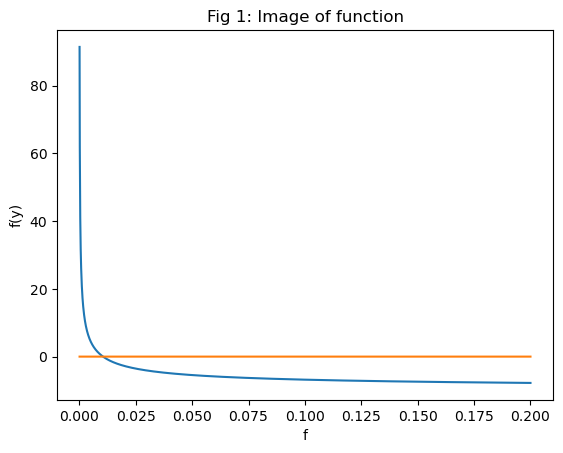

In [151]:
x = np.arange(0.0001,0.2,0.0001)
y = [c_w(i) for i in x]
y_0 = np.zeros(x.shape)
plt.plot(x,y)
plt.plot(x, y_0)
plt.xlabel("f")
plt.ylabel("f(y)")
plt.title("Fig 1: Image of function")
plt.show()

可得正常的函数图像，由此可知，函数是在0点趋向无穷大的

In [152]:
c_w(0.0105)

0.0016072492313661257

In [165]:
ks = [i for i in range(46)]
y_all = [[0 for _ in range(46)] for _ in range(6)]

In [154]:
print(y_all[0][0])

0


## 二分法

In [166]:
# ------二分法------

# 假定左侧一定为负数
# left 是左侧边界，right是右侧边界
def bi(left, right, e,func):
    start = time.time()
    mid = (left+right)/2
    k = 0
    m = 1+(math.log(right-left)-math.log(2*e))//math.log(2)
    dotPath = [mid]
    times = [0]
    while k<=m:
        # 中间值大于0, 则根应当在左侧，需要更新右侧区间
        if func(mid) == 0:
            mid = mid
            return k, mid
        elif func(left)*func(mid) < 0:
            right = (left+right)/2
        else:
            left = (left+right)/2
        mid = (left+right)/2
        dotPath.append(mid)
        k+= 1
        times.append(k)
    y = [func(i) for i in dotPath]
    print(y)
    
    for i in range(len(y)):
        y_all[0][i] = y[i]
    print(y_all)
    # print("Run time is:", time.time()-start)

    # plt.plot(times, y)
    # plt.xlabel("k")
    # plt.ylabel("f(x)")
    # plt.title("Fig2: Bisection Method k-f(x) image")
    # plt.plot(times, [0]*len(dotPath))
    # plt.show()
    return mid,k

In [167]:
bi(0.00001,0.02, 10**(-15), c_w)

[0.24684526458393385, -1.6395550963330692, -0.8379210849841527, -0.3406241983042353, -0.0598029986535451, 0.0900497684017445, 0.014287893698153198, -0.022962564897515136, -0.004389063420823902, 0.0049364231689938975, 0.00027043941392079773, -0.0020601211796371643, -0.0008950432941432496, -0.0003123525575983166, -2.0969228044620536e-05, 0.00012473192865591898, 5.1880559265526927e-05, 1.5455467853087157e-05, -2.7569295344420652e-06, 6.349256798543479e-06, 1.7961605411898063e-06, -4.803852693413546e-07, 6.578874423013303e-07, 8.87510385183532e-08, -1.9581712784599858e-07, -5.353304821653637e-08, 1.7608995150908413e-08, -1.796202653281398e-08, -1.765148027743635e-10, 8.716240174067025e-09, 4.269862685646331e-09, 2.0466739414359836e-09, 9.3507956933081e-10, 3.792806069213839e-10, 1.013837902519299e-10, -3.75663944396365e-11, 3.19086979061467e-11, -2.8279600883251987e-12, 1.453948073049105e-11, 5.856648499502626e-12, 1.5134560271690134e-12, -6.572520305780927e-13, 4.263256414560601e-13, -1.1

(0.010503363998367606, 45)

In [157]:
from scipy.misc import derivative

## 弦截法

In [158]:
# 弦截法
def secant(x0,x1, tol,func):
    start = time.time()
    x2 = x1 - (x1-x0)*func(x1)/(func(x1)-func(x0))
    y_all[1][0] = c_w(x0)
    ys = [func(x2)]
    k = 1
    ks = [k]
    while abs(x2-x1)>=tol:
        x0 = x1
        x1 = x2
        x2 = x1 - (x1-x0)*func(x1)/(func(x1)-func(x0))
        k+=1
        ks.append(k)
        ys.append(func(x2))    
    print("Run time is:", time.time()-start)
    for i in range(len(ys)):
        y_all[1][i+1] = ys[i]
    plt.plot(ks,ys)
    plt.plot(ks,[0]*len(ks))
    plt.xlabel("k")
    plt.ylabel("f(x)")
    plt.title("Fig3: Secant Method k-f(x) image")
    plt.show()
    return x2,k


In [159]:
x0 = 0.0001 
x1 = 0.0106
x2 = x1 - (x1-x0)*c_w(x1)/(c_w(x1)-c_w(x0))
print(x2)

0.010594738060244087


Run time is: 0.0


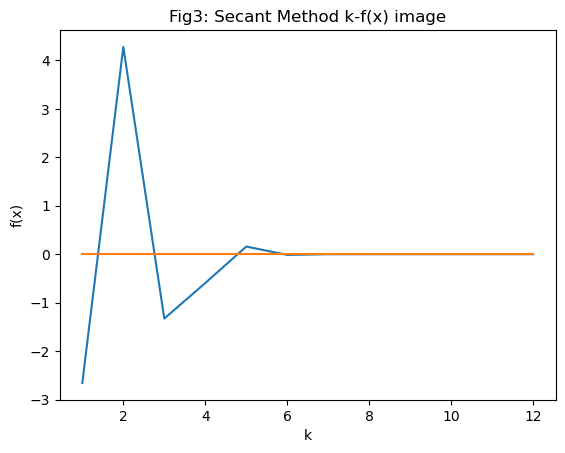

(0.010503363998367649, 12)

In [168]:
secant(0.0001,0.02,10**(-323),c_w)

In [161]:
print(y_all)

[[0.24684526458393385, -1.6395550963330692, -0.8379210849841527, -0.3406241983042353, -0.0598029986535451, 0.0900497684017445, 0.014287893698153198, -0.022962564897515136, -0.004389063420823902, 0.0049364231689938975, 0.00027043941392079773, -0.0020601211796371643, -0.0008950432941432496, -0.0003123525575983166, -2.0969228044620536e-05, 0.00012473192865591898, 5.1880559265526927e-05, 1.5455467853087157e-05, -2.7569295344420652e-06, 6.349256798543479e-06, 1.7961605411898063e-06, -4.803852693413546e-07, 6.578874423013303e-07, 8.87510385183532e-08, -1.9581712784599858e-07, -5.353304821653637e-08, 1.7608995150908413e-08, -1.796202653281398e-08, -1.765148027743635e-10, 8.716240174067025e-09, 4.269862685646331e-09, 2.0466739414359836e-09, 9.3507956933081e-10, 3.792806069213839e-10, 1.013837902519299e-10, -3.75663944396365e-11, 3.19086979061467e-11, -2.8279600883251987e-12, 1.453948073049105e-11, 5.856648499502626e-12, 1.5134560271690134e-12, -6.572520305780927e-13, 4.263256414560601e-13, -1.

In [162]:
print(10**(-323))

1e-323


## Steffensen

为什么区域小：

In [163]:
# Steffensen

#x0: 起始位置; tol: 精确值; func: 需要求解的函数
def Steffsen(x0,tol,func):
    plt.xlabel("k")
    plt.ylabel("f(x)")
    plt.title("Fig4: Steffsen Method k-f(x) image")
    start = time.time()
    y0 = func(x0)
    x1 = x0 - y0**2/(y0-func(x0-y0))
    ys = [y0,func(x1)]
    k=1
    ks = [0,k]
    while abs(x1-x0)>tol:
        x0 = x1
        y0 = func(x0)

        # 避免除0错误
        if func(x0) == 0:
            # end = time.time()
            # plt.plot(ks,ys)
            # plt.show()
            # print("run time is:", end - start)
            for i in range(len(ys)):
                y_all[2][i] = ys[i]
                print(ys[i])
            return k, x0
        
        x1 = x0 - y0**2/(func(x0)-func(x0-y0))
        k += 1
        ks.append(k)
        ys.append(func(x1))
        
    print("run time is:", time.time() - start)
    # 记录误差
    for i in range(len(ys)):
        y_all[2][i] = ys[i]
        print(ys[i])
    # 单步运行输出
    # plt.plot(ks,ys)
    
    # plt.show()
    return x1

In [164]:
x = 0
xs = np.arange(0.0000001,1,0.0000001)
err = 0
x_err = []
ts = []
for i in xs:
    x+=1
    try:
        Steffsen(i, 10**(-15), c_w)
    except Exception as e:
        err+=1
        x_err.append(i)
    else:
        ts.append(i)

KeyboardInterrupt: 

In [ ]:
Steffsen(0.015)

In [ ]:
print(min(ts))

In [169]:
try:
    k, x = Steffsen(0.0104815, 10*(-15), c_w)
except Exception as e:
    print("err:",e)
print(k,x)

0.010459951994203465
0.010207229360434056
0.009236265089107576
0.007081147977336499
0.0039052949467084375
0.0011300763284971538
9.197265507232544e-05
6.039490525466817e-07
2.602362769721367e-11
0.0
9 0.010503363998367649


In [ ]:
print(y_all)

[[0.24684526458393385, -1.6395550963330692, -0.8379210849841527, -0.3406241983042353, -0.0598029986535451, 0.0900497684017445, 0.014287893698153198, -0.022962564897515136, -0.004389063420823902, 0.0049364231689938975, 0.00027043941392079773, -0.0020601211796371643, -0.0008950432941432496, -0.0003123525575983166, -2.0969228044620536e-05, 0.00012473192865591898, 5.1880559265526927e-05, 1.5455467853087157e-05, -2.7569295344420652e-06, 6.349256798543479e-06, 1.7961605411898063e-06, -4.803852693413546e-07, 6.578874423013303e-07, 8.87510385183532e-08, -1.9581712784599858e-07, -5.353304821653637e-08, 1.7608995150908413e-08, -1.796202653281398e-08, -1.765148027743635e-10, 8.716240174067025e-09, 4.269862685646331e-09, 2.0466739414359836e-09, 9.3507956933081e-10, 3.792806069213839e-10, 1.013837902519299e-10, -3.75663944396365e-11, 3.19086979061467e-11, -2.8279600883251987e-12, 1.453948073049105e-11, 5.856648499502626e-12, 1.5134560271690134e-12, -6.572520305780927e-13, 4.263256414560601e-13, -1.

In [ ]:
c_w(0.010503363998367649)

0.0

原式为：
$$
\frac{1}{ \sqrt{f} }+2lg( \frac{\epsilon}{3.7D} + \frac{2.51}{Re\sqrt{f}}) = 0
$$

更换为迭代格式为：
$$
(\frac{1}{2lg( \frac{\epsilon}{3.7D} + \frac{2.51}{Re\sqrt{f}})} )^2=f
$$

In [ ]:
# cw_p
def c_w_p(f,eps=0.00002,d=0.6,re=5813924.33689002):
    tmp = 2*math.log10( eps/(3.7*d)+2.51/( re*math.sqrt(f)) )
    return (1/tmp)**2

## Picard

In [174]:
# Picard迭代法
def picard(x0,tol,func):
    start = time.time()
    x1 = func(x0)
    xs = [x0,x1]
    k = 1
    ks = [0,k]
    while abs(x0-x1)>tol:
        x2 = func(x1)
        x0 = x1
        x1 = x2
        k+=1
        ks.append(k)
        xs.append(x1)
    print("Run time is:", time.time()-start)
    ys = [c_w(i) for i in xs]

    plt.plot(ks,ys)
    plt.plot(ks, [0]*len(ks))
    plt.xlabel("k")
    plt.ylabel("c_w(f)")
    plt.title("Fig5: Picard Method k-c_w(f) image")
    plt.show()
    for i in range(len(ys)):
        y_all[3][i] = ys[i]
        print(ys[i])
    return k, x1
    

In [ ]:
c_w_p(0.010518132169925443)

0.010502945549672484

Run time is: 0.0


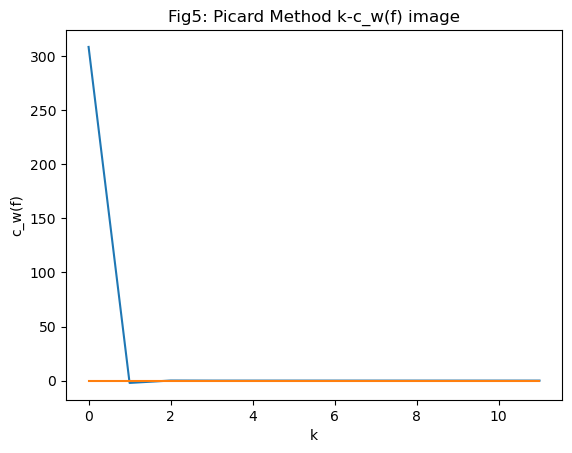

308.553680294862
-2.144546095300705
0.06292786611412104
-0.001783032730763523
5.05718472343375e-05
-1.4343199374877713e-06
4.068025027947897e-08
-1.1537757416135719e-09
3.2724045695431414e-11
-9.29034627006331e-13
2.6645352591003757e-14
0.0


(11, 0.010503363998367649)

In [175]:
picard(0.00001, 10**(-15),c_w_p)

In [197]:
for i in range(46):
    y_all[4][i] = 0

In [ ]:
print(y_all)

[[0.24684526458393385, -1.6395550963330692, -0.8379210849841527, -0.3406241983042353, -0.0598029986535451, 0.0900497684017445, 0.014287893698153198, -0.022962564897515136, -0.004389063420823902, 0.0049364231689938975, 0.00027043941392079773, -0.0020601211796371643, -0.0008950432941432496, -0.0003123525575983166, -2.0969228044620536e-05, 0.00012473192865591898, 5.1880559265526927e-05, 1.5455467853087157e-05, -2.7569295344420652e-06, 6.349256798543479e-06, 1.7961605411898063e-06, -4.803852693413546e-07, 6.578874423013303e-07, 8.87510385183532e-08, -1.9581712784599858e-07, -5.353304821653637e-08, 1.7608995150908413e-08, -1.796202653281398e-08, -1.765148027743635e-10, 8.716240174067025e-09, 4.269862685646331e-09, 2.0466739414359836e-09, 9.3507956933081e-10, 3.792806069213839e-10, 1.013837902519299e-10, -3.75663944396365e-11, 3.19086979061467e-11, -2.8279600883251987e-12, 1.453948073049105e-11, 5.856648499502626e-12, 1.5134560271690134e-12, -6.572520305780927e-13, 4.263256414560601e-13, -1.

## Aitken

非常快！而且由于迭代格式较好，其最终的范围 也很大

In [198]:
def Aitken_l(x0, tol,func):
    plt.xlabel("k")
    plt.ylabel("c_w(f)")
    plt.title("Fig6: Aitken Method k-c_w(f)")
    start = time.time()
    x1 = func(x0)
    x2 = func(x1)
    x3 = x2 - (x2-x1)**2/(x2-2*x1+x0)
    k = 1
    ys = [c_w(x0), c_w(x3)]
    ks = [0, k]
    while abs(x3-x0)>=tol:
        x0 = x3
        x1 = func(x0)
        x2 = func(x1)
        if x2-2*x1+x0 == 0:
            print("run time is:", time.time()-start)
            for i in range(len(ys)):
                y_all[4][i] = ys[i]
                print(ys[i])
            plt.plot(ks,ys)
            plt.show()
            return x3,k
        x3 = x2 - (x2-x1)**2/(x2-2*x1+x0)
        k+=1
        ks.append(k)
        ys.append(c_w(x3))
    print("run time is:", time.time()-start)
    plt.plot(ks,ys)
    plt.show()
    for i in range(len(ys)):
        y_all[4][i] = ys[i]
        print(ys[i])
    return x3,k

run time is: 0.0
308.553680294862
-0.7334181816325245
-5.84851248977003e-05
-3.694822225952521e-13
0.0


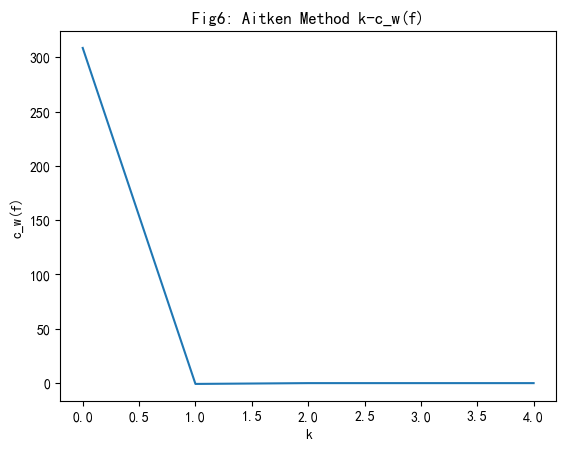

(0.010503363998367649, 4)

In [199]:
Aitken_l(0.00001,10*(-15),c_w_p)

In [200]:
print(y_all)

[[0.24684526458393385, 1.6395550963330692, 0.8379210849841527, 0.3406241983042353, 0.0598029986535451, 0.0900497684017445, 0.014287893698153198, 0.022962564897515136, 0.004389063420823902, 0.0049364231689938975, 0.00027043941392079773, 0.0020601211796371643, 0.0008950432941432496, 0.0003123525575983166, 2.0969228044620536e-05, 0.00012473192865591898, 5.1880559265526927e-05, 1.5455467853087157e-05, 2.7569295344420652e-06, 6.349256798543479e-06, 1.7961605411898063e-06, 4.803852693413546e-07, 6.578874423013303e-07, 8.87510385183532e-08, 1.9581712784599858e-07, 5.353304821653637e-08, 1.7608995150908413e-08, 1.796202653281398e-08, 1.765148027743635e-10, 8.716240174067025e-09, 4.269862685646331e-09, 2.0466739414359836e-09, 9.3507956933081e-10, 3.792806069213839e-10, 1.013837902519299e-10, 3.75663944396365e-11, 3.19086979061467e-11, 2.8279600883251987e-12, 1.453948073049105e-11, 5.856648499502626e-12, 1.5134560271690134e-12, 6.572520305780927e-13, 4.263256414560601e-13, 1.1368683772161603e-13

## Newton

由于是切线，导致其如果结果过大，x会变为负数，解决方法为改变函数形式或者规定起始范围

In [178]:
def newton_iter(x0,tol,func):
    plt.xlabel("k")
    plt.ylabel("c_w(f)")
    plt.title("Fig7: Newton Method k-c_w(f) image")
    start = time.time()
    x1 = x0 - func(x0)/derivative(func,x0,10**(-8))
    xs = [c_w(x0), c_w(x1)]
    k = 1
    ks = [0, k]
    while abs(x0-x1)>=tol:
        x0 = x1
        x1 = x0-func(x0)/derivative(func,x0,10**(-8))
        k+=1
        ks.append(k)
        xs.append(c_w(x1))
    print("Run time is:",time.time()-start)
    plt.plot(ks, xs)
    plt.plot(ks, [0]*len(ks))
    plt.show()
    for i in range(len(xs)):
            y_all[5][i] = xs[i]
            print(xs[i])
    return x1,k

Run time is: 0.0009999275207519531


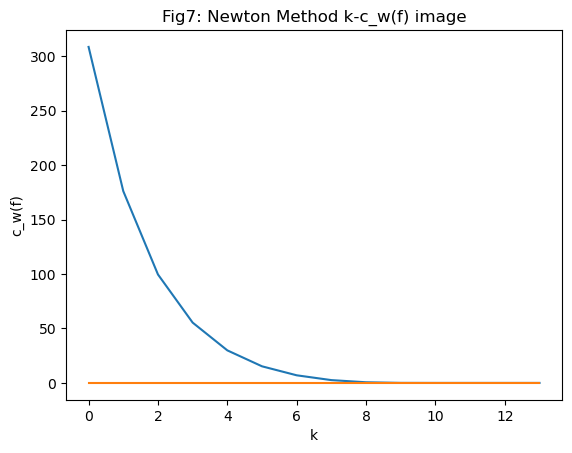

308.553680294862
176.1201728026464
99.59917298852038
55.3909346195899
29.886008818041873
15.249608193543411
6.993888638452878
2.5827636795376065
0.5927104987918081
0.04527934992993288
0.00030196980695151865
1.3590165437449286e-08
1.7763568394002505e-15
0.0


(0.01050336399836765, 13)

In [179]:
newton_iter(0.00001, 10**(-15),c_w)

In [ ]:
print(y_all)

[[0.24684526458393385, -1.6395550963330692, -0.8379210849841527, -0.3406241983042353, -0.0598029986535451, 0.0900497684017445, 0.014287893698153198, -0.022962564897515136, -0.004389063420823902, 0.0049364231689938975, 0.00027043941392079773, -0.0020601211796371643, -0.0008950432941432496, -0.0003123525575983166, -2.0969228044620536e-05, 0.00012473192865591898, 5.1880559265526927e-05, 1.5455467853087157e-05, -2.7569295344420652e-06, 6.349256798543479e-06, 1.7961605411898063e-06, -4.803852693413546e-07, 6.578874423013303e-07, 8.87510385183532e-08, -1.9581712784599858e-07, -5.353304821653637e-08, 1.7608995150908413e-08, -1.796202653281398e-08, -1.765148027743635e-10, 8.716240174067025e-09, 4.269862685646331e-09, 2.0466739414359836e-09, 9.3507956933081e-10, 3.792806069213839e-10, 1.013837902519299e-10, -3.75663944396365e-11, 3.19086979061467e-11, -2.8279600883251987e-12, 1.453948073049105e-11, 5.856648499502626e-12, 1.5134560271690134e-12, -6.572520305780927e-13, 4.263256414560601e-13, -1.

In [ ]:
tol = 10**(-15)
left = 0.0001
right = 0.04
mid = (left+right)/2
while abs(left-mid)>tol:
    try:
        newton_iter(mid, 10**(-15),c_w)
    except:
        right = mid
    else:
        left = mid
    mid = (left+right)/2
print(mid)

0.023659343933453217


In [ ]:
newton_iter(0.023659343933453217, 10**(-15),c_w)

(0.010503363998367649, 22)

In [186]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题


In [193]:
for i in range(6):
    for j in range(46):
        y_all[i][j] = abs(y_all[i][j])

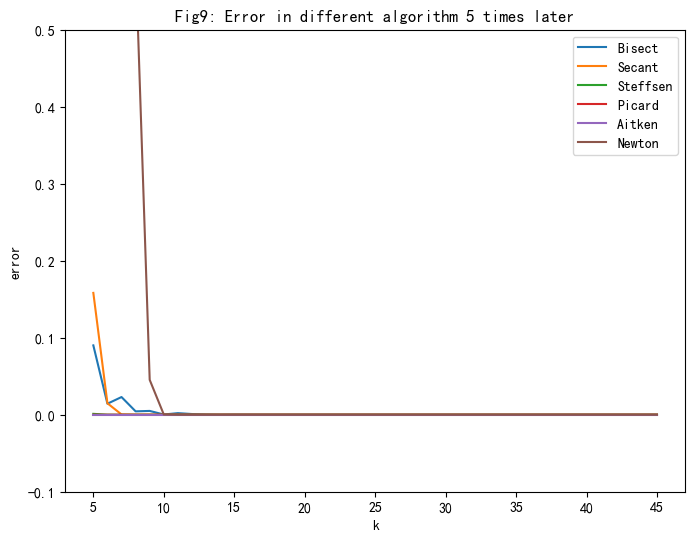

In [210]:
plt.figure(figsize=(8, 6))
plt.plot(ks[5:],y_all[0][5:], label = "Bisect")
plt.plot(ks[5:],y_all[1][5:], label = "Secant")
plt.plot(ks[5:],y_all[2][5:], label = "Steffsen")
plt.plot(ks[5:],y_all[3][5:], label = "Picard")
plt.plot(ks[5:],y_all[4][5:], label = "Aitken")
plt.plot(ks[5:],y_all[5][5:], label = "Newton")
plt.legend(loc=0)
plt.xlabel("k")
plt.ylabel("error")
plt.title("Fig9: Error in different algorithm 5 times later")

plt.ylim(top = 0.5, bottom=-0.1)
plt.show()

In [203]:
print(y_all)

[[0.24684526458393385, 1.6395550963330692, 0.8379210849841527, 0.3406241983042353, 0.0598029986535451, 0.0900497684017445, 0.014287893698153198, 0.022962564897515136, 0.004389063420823902, 0.0049364231689938975, 0.00027043941392079773, 0.0020601211796371643, 0.0008950432941432496, 0.0003123525575983166, 2.0969228044620536e-05, 0.00012473192865591898, 5.1880559265526927e-05, 1.5455467853087157e-05, 2.7569295344420652e-06, 6.349256798543479e-06, 1.7961605411898063e-06, 4.803852693413546e-07, 6.578874423013303e-07, 8.87510385183532e-08, 1.9581712784599858e-07, 5.353304821653637e-08, 1.7608995150908413e-08, 1.796202653281398e-08, 1.765148027743635e-10, 8.716240174067025e-09, 4.269862685646331e-09, 2.0466739414359836e-09, 9.3507956933081e-10, 3.792806069213839e-10, 1.013837902519299e-10, 3.75663944396365e-11, 3.19086979061467e-11, 2.8279600883251987e-12, 1.453948073049105e-11, 5.856648499502626e-12, 1.5134560271690134e-12, 6.572520305780927e-13, 4.263256414560601e-13, 1.1368683772161603e-13

In [189]:
1e-13

1e-13

In [190]:
kkk = [1e-13]
print(kkk)

[1e-13]
